In [1]:
#Imports needed
import numpy as np
import matplotlib.pyplot
import random
#Number of columns/elements/genes for each chromosome
num_genes = 1
#Number of bits per gene
gene_size = 8
#Number of chromosomes(rows in population)
num_chromosomes = 8

#Number of parents that will be selected to mate in crossover
num_parents_mating = 4
#Population size which is number of chromosomes by genes in each chromosome
pop_size = (num_chromosomes,num_genes) # The population will have num_chromosomes chromosome where each chromosome has num_genes genes.

#The limits of the genes in the whole population
low_limit = 0
high_limit = 255


In [2]:
#Fitness function
def cal_pop_fitness(pop):
    fitness = np.sin((np.dot(np.pi, pop))/256)
    return fitness

In [3]:
#Mating function to select the best parents from the fitness that will continue to the crossover
def select_mating_pool(pop, fitness, num_parents):
# Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = np.empty((num_parents, pop.shape[1]))
    #Loop with number of parents that are wanted to be mated
    for parent_num in range(num_parents):
        #Get index of the parents with the maximum fitness as trying to find global minimum
        max_fitness_idx = np.where(fitness == np.max(fitness))
        #Getting the index
        max_fitness_idx = max_fitness_idx[0][0]
        #Putting the parents with the maximum fitness in the parents list
        parents[parent_num, :] = pop[max_fitness_idx, :]
        ##Filling the emtpy index in fitness with a very low number to prevent selecting it again
        fitness[max_fitness_idx] = -99999999999
    return parents

In [4]:
#Gray Code functions

#Gray code funcion that generates the Gray code for the numbers till n
def gray_code(n):
    result = [0] * (n+1)
    for i in range(n+1):
        result[i] = (i // 2) ^ i
    return result

#Gray code function that generates the Gray code for a specific number
def gray_code_for_number(n):
    return gray_code(n)[-1]


# Applying Gray code function on the entire population array
def gray_code_for_array(array):
    grayed_array = []
    for i in array:
        grayed_array.append(gray_code_for_number(i))
    return grayed_array

# concatenating zeroes to equate the number of bit to 8
def concat_zeroes(binary):
    if len(binary) < 8:
        return "0"*(8-len(binary))+binary
    else:
        return binary

In [5]:
#The repair function that changes value to high if it was a higher value and low if it was a lower value
def repair(offspring,low,high):
    if offspring>high:
        offspring = high
    elif offspring<low:
        offspring = low
    return offspring

In [6]:
#Crossover Function

#50% Crossover Function
def crossover(parents, offspring_size):
    # Initializing an empty offspring array.
    offspring = np.empty(offspring_size)
    # Looping the offspring size
    for k in range(offspring_size[0]):
        #Getting the index of the first parent to mate
        parent1_idx = k%parents.shape[0]
        #Getting the index of the second parent to mate
        parent2_idx = (k+1)%parents.shape[0]
        # Getting the gray code of the parents at their indexes
        parent1 = gray_code_for_number(int(parents[parent1_idx]))
        parent2 = gray_code_for_number(int(parents[parent2_idx]))
        #Converting parents' genes to binary and making sure they are 8 bits gene
        bin1   = concat_zeroes(bin(parent1)[2:])
        bin2   = concat_zeroes(bin(parent2)[2:])
        #Setting the crossover point to be half the length of the binary number
        crossover_point = int(len(bin1)//2)
        #Setting the new offspring to be the first half of the first parent and the second half to be taken from the second parent
        offspring[k] = bin1[:crossover_point] + bin2[crossover_point:]
        #Converting the binary back to an integer for better printing and easier insight and debugging
        offspring[k] = int(str(int(offspring[k])),2)
        #Repairing the offspring to be within the limits of the equation
        offspring[k] = repair(offspring[k],low_limit,high_limit)
    return offspring

#One Point Crossover Function
def one_point_crossover(parents, offspring_size):
    # Getting a random cross over point.
    crossover_point = np.random.randint(0,7)
    # Initializing an empty offspring array.
    offspring = np.empty(offspring_size)
    # Looping the offspring size
    for k in range(offspring_size[0]):
        #Getting the index of the first parent to mate
        parent1_idx = k%parents.shape[0]
        #Getting the index of the second parent to mate
        parent2_idx = (k+1)%parents.shape[0]
        # Getting the gray code of the parents at their indexes
        parent1 = gray_code_for_number(int(parents[parent1_idx]))
        parent2 = gray_code_for_number(int(parents[parent2_idx]))
        #Converting parents' genes to binary and making sure they are 8 bits gene
        bin1 , bin2 =  concat_zeroes(bin(parent1)[2:]), concat_zeroes(bin(parent2)[2:])
        #Making crossover for parents with regards to the crossover points
        offspring[k] = bin1[:crossover_point] + bin2[crossover_point:]
        #Converting the binary back to an integer for better printing and easier insight and debugging
        offspring[k] = int(str(int(offspring[k])),2)
        #Repairing the crossover offspring to be within the limits of the equation
        offspring[k] = repair(offspring[k],low_limit,high_limit)
    return offspring

#Two Point Crossover Function
def two_point_crossover(parents, offspring_size):
    # Getting two random cross over points.
    crossover_point1 = np.random.randint(0,7)
    crossover_point2 = np.random.randint(0,7)
    # Making sure that the crossover points are picked differently and crossover point 1 is smaller that crossover point 2.
    while(crossover_point1 == crossover_point2 or crossover_point1 > crossover_point2):
        crossover_point1 = np.random.randint(0,7)
        crossover_point2 = np.random.randint(0,7)
    # Initializing an empty offspring array.
    offspring = np.empty(offspring_size)
    # Looping the offspring size
    for k in range(offspring_size[0]):
        #Index of the first mating parent.
        parent1_idx = k%parents.shape[0]
        #Index of the second mating parent.
        parent2_idx = (k+1)%parents.shape[0]
        # Getting the gray code of the parents at their indexes
        parent1 = gray_code_for_number(int(parents[parent1_idx]))
        parent2 = gray_code_for_number(int(parents[parent2_idx]))
        #Converting parents' genes to binary and making sure they are 8 bits gene
        bin1 , bin2 = concat_zeroes(bin(parent1)[2:]), concat_zeroes(bin(parent2)[2:])
        #Making crossover for parents with regards to the crossover points
        offspring[k] = bin1[:crossover_point1] + bin2[crossover_point1:crossover_point2] + bin1[crossover_point2:]
        #Converting the binary back to an integer for better printing and easier insight and debugging
        offspring[k] = int(str(int(offspring[k])),2)
        #Repairing the crossover offspring to be within the limits of the equation
        offspring[k] = repair(offspring[k],low_limit,high_limit)
    return offspring


In [7]:
#Mutation function that takes crossover offsprings and the mutation probability ranging from (0,1) and returns the mutated offsprings
def mutation(offspring_crossover, mutation_probability):
    # Mutation Number is how many bits in the genes will be mutated from the entire crossover offsprings. Calculated by mutation_probability*number_of_crossover_offsprings*number_of_bits_per_gene
    mutation_number = int(np.ceil(mutation_probability*offspring_crossover.shape[0]*8))
    # Mutated offspring array contains random unique numbers from 0 to the total population size(number of chromosomes * number of bits per gene).
    mutated_offspring_array = random.sample(range(0,offspring_crossover.shape[0]*8),mutation_number)
    #Looping the mutation number
    for i in range(mutation_number):
        #Getting offspring_index by getting element i in mutated_offspring_array and dividing by number of  bits per gene
        offspring_idx = int(mutated_offspring_array[i]/8)
        #Getting gene_index by getting element i in mutated_offspring_array and getting remainder after dividing by number of bits per gene
        gene_idx = int(mutated_offspring_array[i]%8)
        # Making sure that the gene is made of 8 bits
        offspring_binary = concat_zeroes(bin(int(offspring_crossover[offspring_idx]))[2:])
        #Complementing a bit in the gene inside offspring_crossover at offspring_idx  with a random number within the range.
        if offspring_binary[gene_idx] == '0':
            mutated_offspring = offspring_binary[:gene_idx]+"1"+offspring_binary[gene_idx+1:]        
        else:
            mutated_offspring = offspring_binary[:gene_idx]+"0"+offspring_binary[gene_idx+1:]
        # Returning the resulting offspring after mutating the crossover offsprings
        offspring_crossover[offspring_idx] = int(str(int(mutated_offspring)),2)
    mutated_offsprings = offspring_crossover
    return mutated_offsprings

In [8]:
mutation(np.array([12,15,7,100,21]), 0.1)

array([ 12,  15,  23, 228,  25])

[[213]
 [220]
 [ 45]
 [206]
 [222]
 [136]
 [ 11]
 [ 38]]
Generation :  0
Fitness
[[0.50353838]
 [0.42755509]
 [0.52458968]
 [0.57580819]
 [0.40524131]
 [0.99518473]
 [0.13458071]
 [0.44961133]]
Best result :  0.9951847266721969
Parents
[[136.]
 [206.]
 [ 45.]
 [213.]]
Crossover
[[172.]
 [185.]
 [ 59.]
 [207.]]
Mutation
[[201.]
 [185.]
 [ 59.]
 [207.]]
Generation :  1
Fitness
[[0.99518473]
 [0.57580819]
 [0.52458968]
 [0.50353838]
 [0.62485949]
 [0.76516727]
 [0.66241578]
 [0.56573181]]
Best result :  0.9951847266721969
Parents
[[136.]
 [185.]
 [ 59.]
 [201.]]
Crossover
[[204.]
 [ 37.]
 [166.]
 [237.]]
Mutation
[[204.]
 [177.]
 [166.]
 [109.]]
Generation :  2
Fitness
[[0.99518473]
 [0.76516727]
 [0.66241578]
 [0.62485949]
 [0.5956993 ]
 [0.8245893 ]
 [0.8932243 ]
 [0.97293995]]
Best result :  0.9951847266721969
Parents
[[136.]
 [109.]
 [166.]
 [177.]]
Crossover
[[ 88.]
 [247.]
 [233.]
 [205.]]
Mutation
[[ 48.]
 [183.]
 [233.]
 [205.]]
Generation :  3
Fitness
[[0.99518473]
 [0.97293995]


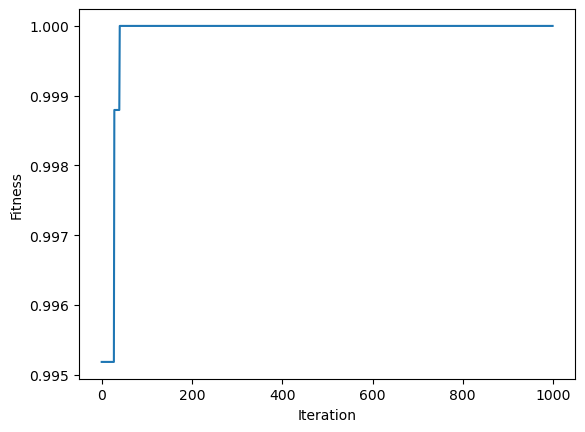

In [9]:
new_population = np.random.randint(low=0, high=256,size=pop_size)
print(new_population)
num_generations = 1000
best_outputs = []

for generation in range(num_generations):
    print("Generation : ", generation)
    # Calculating the fitness of each chromosome in the population.
    fitness = cal_pop_fitness(new_population)
    print("Fitness")
    print(fitness)
    print("Best result : ", np.max(fitness))
    # Storing the best output from the calculated fitness
    best_outputs.append(np.max(fitness))
    # Choosing the best parents in the population for mating.
    parents = select_mating_pool(new_population, fitness,num_parents_mating)
    print("Parents")
    print(parents)
    # Mating the parents using the crossover technique to create new generation of offsprings.
    ## Calling the 50% crossover on the best parents.
    # offspring_crossover =crossover(parents,(pop_size[0]-parents.shape[0], num_genes))
    
    ## Calling the one point crossover on the best parents.
    # offspring_crossover =one_point_crossover(parents,(pop_size[0]-parents.shape[0], num_genes))
    
    ## Calling the two point crossover on the best parents.
    offspring_crossover =two_point_crossover(parents,(pop_size[0]-parents.shape[0], num_genes))
    print("Crossover")
    print(offspring_crossover)
    # Mutating some of the offsprings after crossover.
    offspring_mutation = mutation(offspring_crossover,0.1)
    print("Mutation")
    print(offspring_mutation)
    #Setting the new population with the best parents that were used in crossover and the resulted offspring after crossover and mutation.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

# Calculating fitness of the last generation of parents and offsprings.
fitness = cal_pop_fitness(new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = np.where(fitness == np.max(fitness))
#Printing
print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])
# Drawing a curve of the evolution of the solution using the best solution array that was stored while looping over the generations.
matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()